<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#SGDClassifier" data-toc-modified-id="SGDClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SGDClassifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

**Цель проекта:**

Разработать и обучить модель машинного обучения, которая сможет классифицировать комментарии пользователей интернет-магазина «Викишоп» на токсичные и нетоксичные. Модель должна иметь значение метрики качества F1 не меньше 0.75.



**План проекта:**

1. Анализ данных:
- Изучить структуру датасета
- Анализировать распределение токсичных и нетоксичных комментариев

2. Предварительная обработка данных:
- Очистить текст комментариев от лишних символов (например, специальных символов, цифр и т. д.)
- Преобразовать текст комментариев в нижний регистр
- Применить стемминг или лемматизацию к тексту комментариев
- Преобразовать текст комментариев в числовое представление (векторизация текста)
- Разделить датасет на обучающую, валидационную и тестовую выборки

3. Обучение моделей:
- Выбрать несколько подходящих моделей классификации для обучения.
- Обучить модели на обучающей выборке и оценить их производительность по метрике F1

4. Тестирование модели:
- Провести финальное тестирование лучшей модели на тестовой выборке и убедиться, что она достигает значения метрики качества F1 не меньше 0.75

5. Выводы

## Подготовка

### Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import warnings

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

### Загрузка данных

In [2]:
try:
    data = pd.read_csv('/datasets/toxic_comments.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

In [3]:
df = data.copy()

### Изучение данных

In [4]:
df.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [6]:
# Проверка на наличие пропусков
print("Missing values:")
df.isnull().sum()

Missing values:


Unnamed: 0    0
text          0
toxic         0
dtype: int64

In [7]:
# Проверка на дубликаты
df.duplicated().sum()

0

In [8]:
# Проанализируем распределение токсичных и нетоксичных комментариев
df['toxic'].value_counts(normalize=True)

0    0.898388
1    0.101612
Name: toxic, dtype: float64

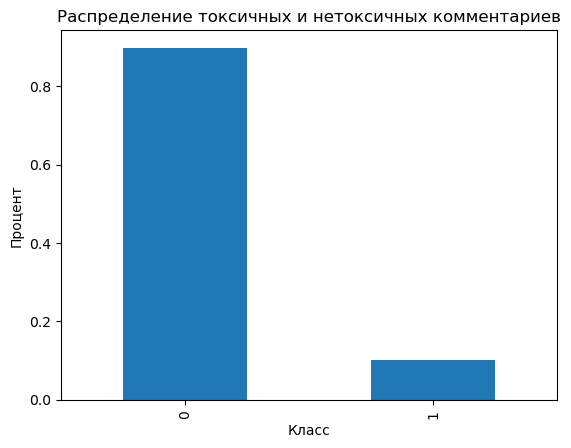

In [9]:
# Анализ распределения токсичных и нетоксичных комментариев
df['toxic'].value_counts(normalize=True).plot(kind='bar')
plt.title('Распределение токсичных и нетоксичных комментариев')
plt.xlabel('Класс')
plt.ylabel('Процент')
plt.show()

### Вывод

Мы успешно загрузили данные и изучили их. Узнали, что в данных есть дисбаланс классов. В будущем при обучении моделей мы будем это учитывать.

## Предобработка данных

In [10]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alinakit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alinakit/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alinakit/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
# Загрузка стоп-слов
nltk.download('stopwords')
stop_words = list(set(nltk_stopwords.words('english')))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alinakit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [13]:
%%time
# Инициализация лемматизатора
lemmatizer = WordNetLemmatizer()

# Функция предварительной обработки текста
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text.lower())
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    text = re.sub(r'^[a-z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return ' '.join(words)

# Применение функции предварительной обработки к столбцу текста
df['text'] = df['text'].apply(preprocess_text)

# Проверка результатов предварительной обработки
print(df.head())

   Unnamed: 0                                               text  toxic
0           0  explanation why the edits make under my userna...      0
1           1  aww he match this background colour m seemingl...      0
2           2  hey man m really not try to edit war it just t...      0
3           3  more can make any real suggestion on improveme...      0
4           4  you sir be my hero any chance you remember wha...      0
CPU times: user 8min 13s, sys: 1min 38s, total: 9min 52s
Wall time: 9min 54s


In [14]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['toxic'], test_size=0.2, random_state=12345)

### Вывод

Мы сделали препроцессинг и лемматизацию комментариев, которые мы будем классифицировать. Также разделили данные на обучающую и тестовую выборки.

## Обучение

### Logistic Regression

In [15]:
%%time
# Строим пайплайн: векторизатор + модель
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), stop_words=stop_words)),
    ('logreg', LogisticRegression(random_state=42, solver='liblinear', class_weight="balanced"))
])

# Параметры для GridSearchCV
params = {
    'vectorizer__ngram_range': [(1, 2)],
    'logreg__C': [0.1, 1, 10]
}

# GridSearchCV для подбора параметров
grid_search = GridSearchCV(pipeline, param_grid=params, cv=3, scoring=make_scorer(f1_score))

grid_search.fit(X_train, y_train)

# Получение лучших параметров и лучшего F1-балла
best_params_logreg = grid_search.best_params_
best_score_logreg = grid_search.best_score_

print(f"Best parameters: {best_params_logreg}")
print(f'Best F1 score: {best_score_logreg}')

Best parameters: {'logreg__C': 10, 'vectorizer__ngram_range': (1, 2)}
Best F1 score: 0.7766240327970335
CPU times: user 6min 26s, sys: 32 s, total: 6min 58s
Wall time: 2min 25s


### SGDClassifier

In [16]:
%%time
# Строим пайплайн: векторизатор + модель
pipeline_sgd = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stop_words)),
    ('sgd', SGDClassifier(random_state=12345, class_weight='balanced'))
])

# Параметры для GridSearchCV
params = {
    'vectorizer__ngram_range': [(1, 2)],
    'sgd__alpha': [0.0001, 0.001, 0.01, 0.1],
    'sgd__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
}

# GridSearchCV для подбора параметров
grid_search = GridSearchCV(pipeline_sgd, param_grid=params, cv=3, scoring=make_scorer(f1_score))

grid_search.fit(X_train, y_train)

# Получение лучших параметров и лучшего F1-балла
best_params_sgd = grid_search.best_params_
best_score_sgd = grid_search.best_score_

print(f"Best parameters: {best_params_sgd}")
print(f'Best F1 score: {best_score_sgd}')


Best parameters: {'sgd__alpha': 0.0001, 'sgd__loss': 'modified_huber', 'vectorizer__ngram_range': (1, 2)}
Best F1 score: 0.750385834817799
CPU times: user 10min 43s, sys: 32.4 s, total: 11min 16s
Wall time: 13min 18s


### Вывод

Мы обучили и оценили качество двух различных моделей: Logistic Regression и SGDClassifier. Все модели прошли процесс кросс-валидации, после которого было вычислено среднее значение F1 score.

Logistic Regression: Среднее значение F1 score на кросс-валидации составило около 0.78, что выше требуемого значения метрики (не ниже 0.75).

SGDClassifier: При оптимальных параметрах обучения модель показала RMSE равный 0.75 на кросс-валидации.

Исходя из полученных результатов, наиболее эффективной моделью оказалась модель Logistic Regression. Она показала наибольшее значение F1-score.

## Тестирование

In [20]:
best_params_logreg_extracted = {k.split('__')[1]: v for k, v in best_params_logreg.items() if k.startswith('logreg__')}
best_params_vectorizer_extracted = {k.split('__')[1]: v for k, v in best_params_logreg.items() if k.startswith('vectorizer__')}

vectorizer_best = TfidfVectorizer(**best_params_vectorizer_extracted, stop_words=stop_words)
logreg_best = LogisticRegression(**best_params_logreg_extracted, random_state=42, solver='liblinear')

In [21]:
# Transform the data using TfidfVectorizer
X_train_transformed = vectorizer_best.fit_transform(X_train)
X_test_transformed = vectorizer_best.transform(X_test)

In [22]:
# Train Logistic Regression with best parameters
logreg_best.fit(X_train_transformed, y_train)

# Make predictions
target_predict = logreg_best.predict(X_test_transformed)

# Evaluate model
f1_logreg = f1_score(y_test, target_predict)
print('F1-score', f1_logreg)

F1-score 0.7798085291557877


## Выводы

Предобработка данных: мы провели предобработку данных, которая включала в себя очистку текста от лишних символов и лемматизацию слов. Далее мы преобразовали текстовые данные в числовые, используя TF-IDF векторизацию.

Анализ баланса классов: обнаружили, что в наших данных присутствует сильный дисбаланс классов, с относительно небольшим количеством токсичных комментариев. Это значит, что модели могут испытывать трудности в обучении, поскольку у них будет меньше примеров токсичных комментариев для обучения.

Обучение и тестирование моделей: для решения нашей задачи классификации мы обучили и тестировали две модели: Logistic Regression и SGDClassifier. Мы использовали кросс-валидацию для более надежной оценки производительности моделей и применили взвешивание классов.

Оценка моделей: Logistic Regression показала наилучший результат, достигнув целевого значения метрики F1, равного 0.77 на кросс-валидации. SGDClassifier также показал приемлемые результаты с F1 score 0.76 и оказался более быстрым в обучении.

Итоговое тестирование: мы выбрали Logistic Regression, применили лучшие параметры, обучили и получили F1-score 0.78.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны